## HR Data Analysis ##

Load Necessary libraries and load dataset.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("data/HR Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Eliminating redundant entries

In [36]:
# Remove unnecessary columns
unnecessary_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_cleaned = data.drop(columns=unnecessary_columns)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(df_cleaned.head())

Cleaned Dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  .

In [31]:
# Check duplicate rows
duplicate_rows = data.duplicated()

num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

# Remove duplicate rows
df_cleaned = data[~duplicate_rows]

# Display cleaned dataset 
print("Cleaned Dataset:")
print(df_cleaned.head())

Number of duplicate rows: 0
Cleaned Dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfact

Sanitizing columns 

In [37]:
# Handling Missing Values

missing_values = df_cleaned.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


Attrition Rate:
 No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


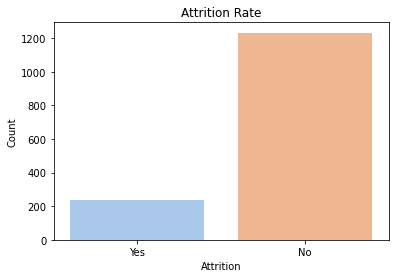

In [38]:
# 1. Attrition Analysis
attrition_rate = df_cleaned['Attrition'].value_counts(normalize=True) * 100
print("Attrition Rate:\n", attrition_rate)

# Visualize attrition rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_cleaned, palette='pastel')
plt.title('Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()



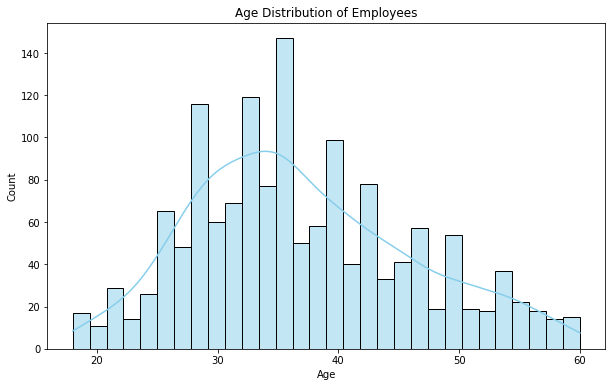

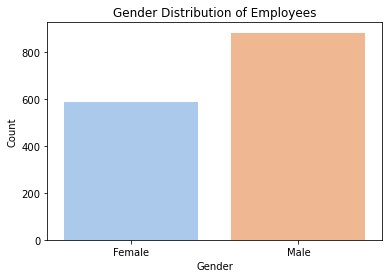

In [39]:
# 2. Employee Demographics Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df_cleaned, palette='pastel')
plt.title('Gender Distribution of Employees')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

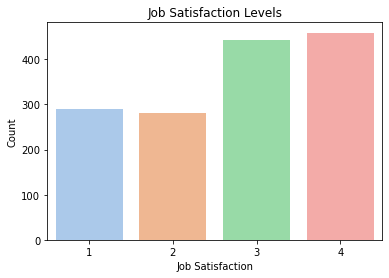

In [41]:
# 3. Employee Satisfaction Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='JobSatisfaction', data=df_cleaned, palette='pastel')
plt.title('Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

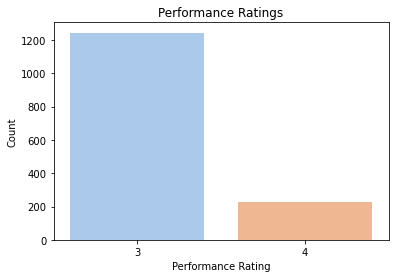

In [42]:
# 4. Performance Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=df_cleaned, palette='pastel')
plt.title('Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()


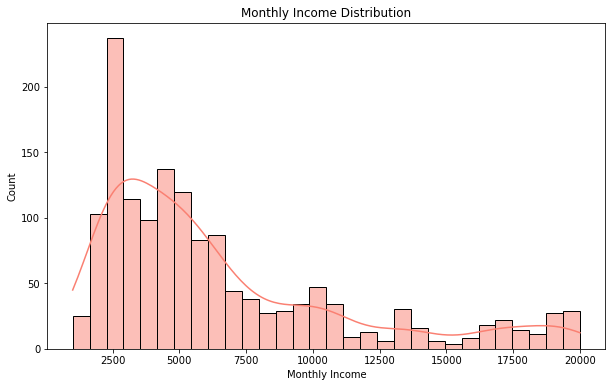

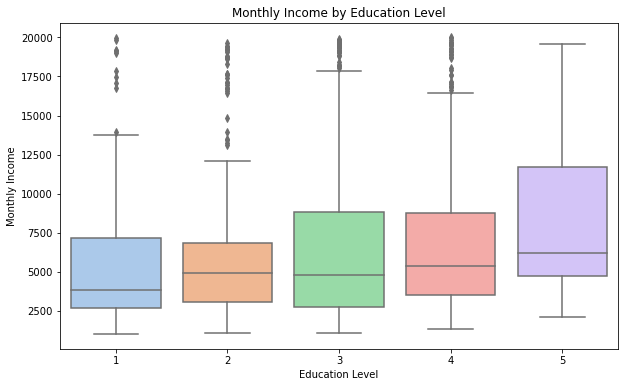

In [43]:
# 5. Salary and Compensation Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='MonthlyIncome', bins=30, kde=True, color='salmon')
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='MonthlyIncome', data=df_cleaned, palette='pastel')
plt.title('Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Monthly Income')
plt.show()

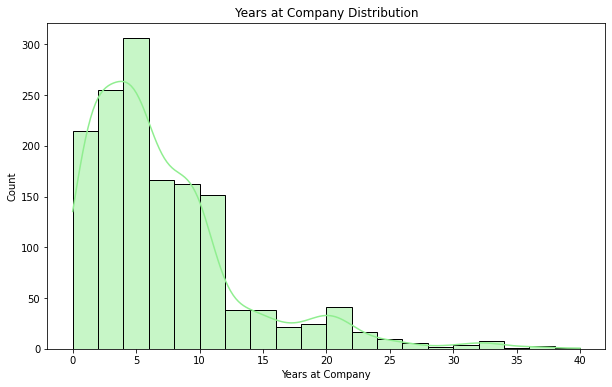

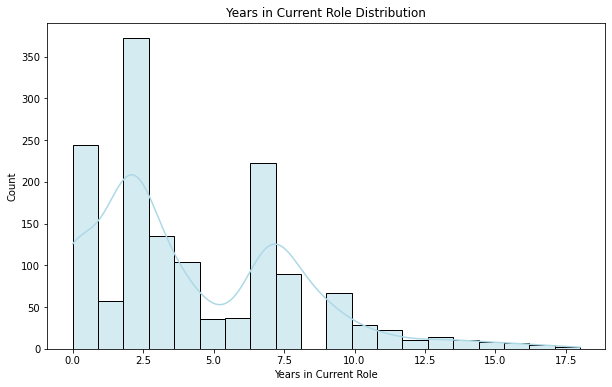

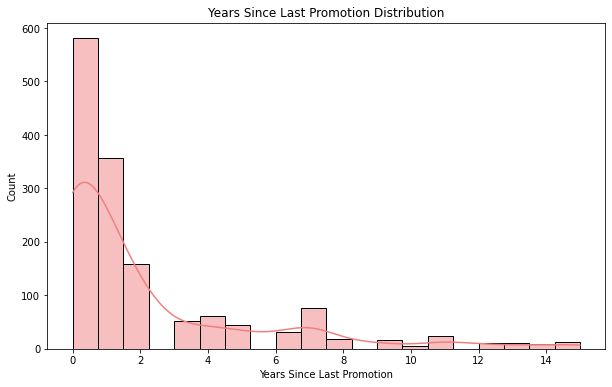

In [44]:
# Employee Tenure and Career Progression Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='YearsAtCompany', bins=20, kde=True, color='lightgreen')
plt.title('Years at Company Distribution')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='YearsInCurrentRole', bins=20, kde=True, color='lightblue')
plt.title('Years in Current Role Distribution')
plt.xlabel('Years in Current Role')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='YearsSinceLastPromotion', bins=20, kde=True, color='lightcoral')
plt.title('Years Since Last Promotion Distribution')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.show() 


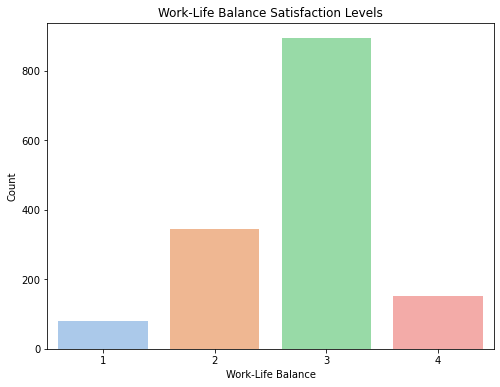

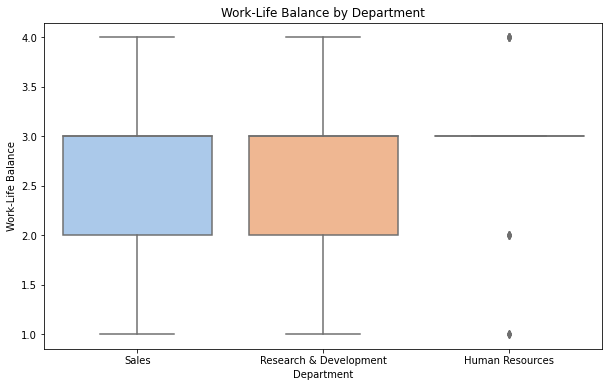

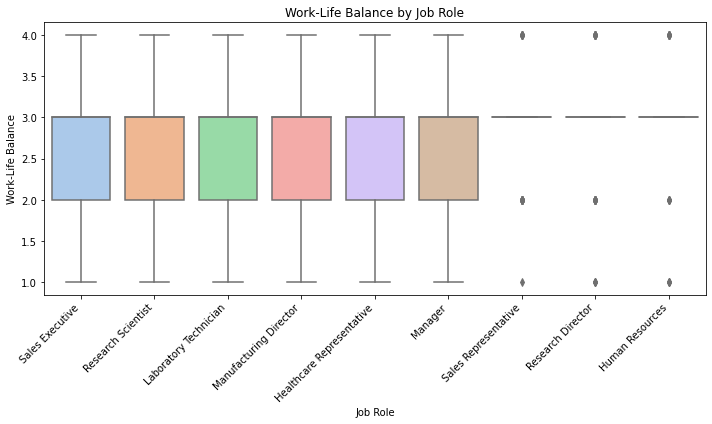

In [45]:
# Work-Life Balance Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', data=df_cleaned, palette='pastel')
plt.title('Work-Life Balance Satisfaction Levels')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='WorkLifeBalance', data=df_cleaned, palette='pastel')
plt.title('Work-Life Balance by Department')
plt.xlabel('Department')
plt.ylabel('Work-Life Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='WorkLifeBalance', data=df_cleaned, palette='pastel')
plt.title('Work-Life Balance by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Work-Life Balance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

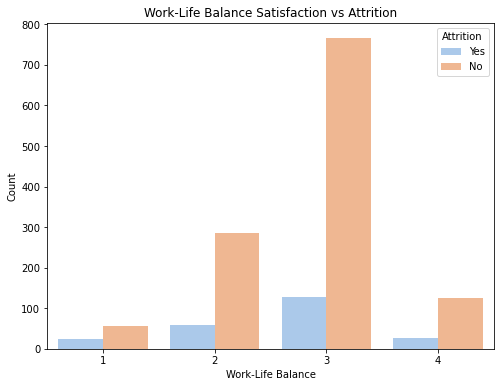

In [46]:
# Explore the relationship between work-life balance satisfaction and attrition
plt.figure(figsize=(8, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df_cleaned, palette='pastel')
plt.title('Work-Life Balance Satisfaction vs Attrition')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()
